In [4]:
import pandas as pd
import tarfile
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from pathlib import Path
import os

project_root = Path().resolve().parent
tar_path = project_root / "dataset" / "HiSeq.tar.gz"
extract_dir = project_root / "data" 

# Extract the files
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(extract_dir)

# CSV paths 
data_csv = extract_dir / "TCGA-PANCAN-HiSeq-801x20531" / "data.csv"
labels_csv = extract_dir / "TCGA-PANCAN-HiSeq-801x20531" / "labels.csv"

# Load the files
X = pd.read_csv(data_csv)
y = pd.read_csv(labels_csv)

# Merge on the sample ID column
df = pd.merge(X, y, on="Unnamed: 0")

# Rename for clarity
df = df.rename(columns={"Unnamed: 0": "sample_id"})

#print("Final shape:", df.shape)
#print(df.head(3))

df.info()

#Check for missing values
missing_total = df.isna().sum().sum()
missing_perc = (missing_total / (df.shape[0] * df.shape[1])) * 100
print(f"Missing values: {missing_total} ({missing_perc:.3f}% of all data)")

#How many different label for cancer types 
label_counts = df["Class"].value_counts()
print(label_counts)

plt.figure(figsize=(8,4))
label_counts.plot(kind="bar", color="#2b8cbe")
plt.title("Tumor Type Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Tumor Type")
plt.savefig("../figures/tumor_type_distribution.png", dpi=300, bbox_inches="tight")
plt.close()

# Ensure the 'figures' directory exists before saving
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/tumor_type_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

df.describe().iloc[:, 1:6] 

os.makedirs("../dataset", exist_ok=True)

# Save the merged file to the real dataset folder (one level up)
df.to_csv("../dataset/gene_expression_merged.csv", index=False)

print("Saved merged dataset to ../dataset/gene_expression_merged.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20533 entries, sample_id to Class
dtypes: float64(20531), object(2)
memory usage: 125.5+ MB
Missing values: 0 (0.000% of all data)
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

Saved merged dataset to ../dataset/gene_expression_merged.csv


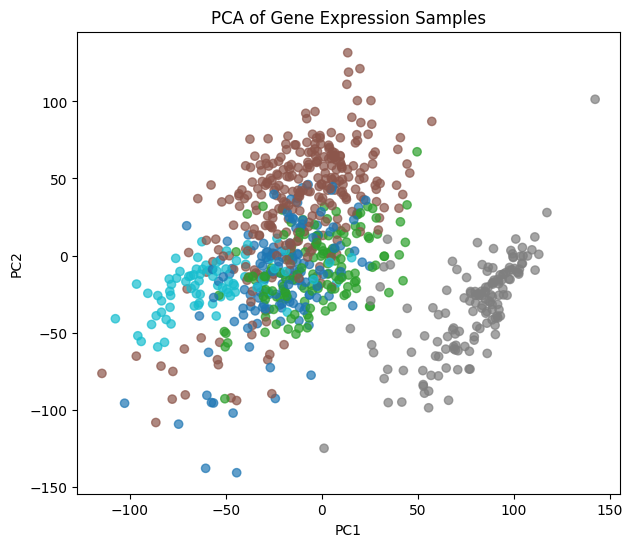

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#EXPLORATORY PCA
# Separate features and labels
X_genes = df.drop(columns=["sample_id", "Class"])
y_labels = df["Class"]

# Scale
X_scaled = StandardScaler().fit_transform(X_genes)

# PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(pca_res[:,0], pca_res[:,1], c=pd.factorize(y_labels)[0], cmap='tab10', alpha=0.7)
plt.title("PCA of Gene Expression Samples")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Label Distribution Summary
The dataset contains 801 tumor samples from five cancer types (BRCA, KIRC, LUAD, PRAD, COAD).
BRCA is the most represented class (~37%), while COAD is the smallest (~9%).
Although slightly imbalanced, the dataset remains suitable for both unsupervised and supervised analysis.

In [6]:
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import numpy as np

data_path = Path("../dataset/gene_expression_merged.csv")
df = pd.read_csv(data_path)
print("Loaded merged dataset:", df.shape)

X = df.drop(columns=["sample_id", "Class"])
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = VarianceThreshold(threshold=0.5)
X_reduced = selector.fit_transform(X_scaled)
print("Reduced dataset shape:", X_reduced.shape)

np.save("../dataset/X_scaled.npy", X_scaled)
np.save("../dataset/X_reduced.npy", X_reduced)
y.to_csv("../dataset/y_labels.csv", index=False)

Loaded merged dataset: (801, 20533)
Reduced dataset shape: (801, 20264)
